In [1]:
#Loading libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!matplotlib inline
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter('ignore')

/bin/bash: matplotlib: command not found


In [2]:
#loading the dataset
df=pd.read_excel('Group Project Data-SFD Data-Toronto Police.xlsx')
df.head()

,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,-79.234955,43.781528,1,GO-2004397105,2004/05/15 04:00:00+00,2004,May,Saturday,136,15,1,Night,D41,0,0,142,Woburn North,137,Woburn (137),-79.234955,43.781528
1,-79.618218,43.733547,2,GO-2004600109,2004/07/26 04:00:00+00,2004,July,Monday,208,26,23,Evening,D23,0,0,1,West Humber-Clairville,1,West Humber-Clairville (1),-79.618218,43.733547
2,-79.518759,43.769157,3,GO-2004311851,2004/05/14 04:00:00+00,2004,May,Friday,135,14,16,Afternoon,D31,1,1,24,Black Creek,24,Black Creek (24),-79.518759,43.769157
3,-79.378870,43.660665,4,GO-2004736004,2004/12/19 05:00:00+00,2004,December,Sunday,354,19,0,Night,D51,1,0,168,Downtown Yonge East,75,Church-Yonge Corridor (75),-79.378870,43.660665
4,-79.212435,43.812075,5,GO-2004303455,2004/04/12 04:00:00+00,2004,April,Monday,103,12,22,Evening,D42,0,0,146,Malvern East,132,Malvern (132),-79.212435,43.812075


# Data Cleaning

First, we are need to look if there is any missing data in the dataset.

In [15]:
#Missing Percentage
missing_percent= df.isnull().sum()*100/len(df)
missing_values=pd.DataFrame({'missing_percent':missing_percent})
missing_values=missing_values.sort_values('missing_percent')
#missing_values=missing_values.drop['X']
missing_values

,missing_percent
X,0.0
NEIGHBOURHOOD_140,0.0
HOOD_140,0.0
NEIGHBOURHOOD_158,0.0
HOOD_158,0.0
INJURIES,0.0
DEATH,0.0
DIVISION,0.0
OCC_TIME_RANGE,0.0
LONG_WGS84,0.0


It means there is no missing data in this dataset. 

The columns names seem hard to understand. So, let's rename them properly.However, before rename the columns, there is one more thing to do which is to drop unnecessary columns.

In [16]:
#date set columns
df.columns

Index(['X', 'Y', 'OBJECTID', 'EVENT_UNIQUE_ID', 'OCC_DATE', 'OCC_YEAR',
       'OCC_MONTH', 'OCC_DOW', 'OCC_DOY', 'OCC_DAY', 'OCC_HOUR',
       'OCC_TIME_RANGE', 'DIVISION', 'DEATH', 'INJURIES', 'HOOD_158',
       'NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140', 'LONG_WGS84',
       'LAT_WGS84'],
      dtype='object')

In [17]:
df.head()

,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,-79.234955,43.781528,1,GO-2004397105,2004/05/15 04:00:00+00,2004,May,Saturday,136,15,1,Night,D41,0,0,142,Woburn North,137,Woburn (137),-79.234955,43.781528
1,-79.618218,43.733547,2,GO-2004600109,2004/07/26 04:00:00+00,2004,July,Monday,208,26,23,Evening,D23,0,0,1,West Humber-Clairville,1,West Humber-Clairville (1),-79.618218,43.733547
2,-79.518759,43.769157,3,GO-2004311851,2004/05/14 04:00:00+00,2004,May,Friday,135,14,16,Afternoon,D31,1,1,24,Black Creek,24,Black Creek (24),-79.518759,43.769157
3,-79.378870,43.660665,4,GO-2004736004,2004/12/19 05:00:00+00,2004,December,Sunday,354,19,0,Night,D51,1,0,168,Downtown Yonge East,75,Church-Yonge Corridor (75),-79.378870,43.660665
4,-79.212435,43.812075,5,GO-2004303455,2004/04/12 04:00:00+00,2004,April,Monday,103,12,22,Evening,D42,0,0,146,Malvern East,132,Malvern (132),-79.212435,43.812075


Columns like X, Y, Object ID, Event Unique ID, OCC DATE, OCC Doy should be removed because for X and Y columns we have their alternate columns like Long_WGS84 and LAT_WGS84. Object ID, Event Unique ID AND OCC Doy columns have no use at all for anything, and we don't need OCC date either since we already have hour, Day, week, month, and year of the event or crime occurance which we can use them more effectively for analysis. Columns Like Hood_158, Hood_140, and Neighbourhood_140 which are also repeated should be removed from dataset.

In [18]:
#drop or removing unnecessary columns
df=df.drop(['X', 'Y','OBJECTID', 'EVENT_UNIQUE_ID', 'OCC_DATE', 'OCC_DOY', 'HOOD_158', 'HOOD_140','NEIGHBOURHOOD_140' ], axis=1)
df.head()

,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,NEIGHBOURHOOD_158,LONG_WGS84,LAT_WGS84
0,2004,May,Saturday,15,1,Night,D41,0,0,Woburn North,-79.234955,43.781528
1,2004,July,Monday,26,23,Evening,D23,0,0,West Humber-Clairville,-79.618218,43.733547
2,2004,May,Friday,14,16,Afternoon,D31,1,1,Black Creek,-79.518759,43.769157
3,2004,December,Sunday,19,0,Night,D51,1,0,Downtown Yonge East,-79.378870,43.660665
4,2004,April,Monday,12,22,Evening,D42,0,0,Malvern East,-79.212435,43.812075


In [22]:
#renaming columns
df.columns=['Year', 'Month', 'Weekdays', 'Day_of_the_month', 'Hour',
       'Time', 'Division', 'Number_of_Death', 'Number_of_Injuries', 'Neighbourhood',
       'Longitude', 'Latitude']
df.head()

,Year,Month,Weekdays,Day_of_the_month,Hour,Time,Division,Number_of_Death,Number_of_Injuries,Neighbourhood,Longitude,Latitude
0,2004,May,Saturday,15,1,Night,D41,0,0,Woburn North,-79.234955,43.781528
1,2004,July,Monday,26,23,Evening,D23,0,0,West Humber-Clairville,-79.618218,43.733547
2,2004,May,Friday,14,16,Afternoon,D31,1,1,Black Creek,-79.518759,43.769157
3,2004,December,Sunday,19,0,Night,D51,1,0,Downtown Yonge East,-79.378870,43.660665
4,2004,April,Monday,12,22,Evening,D42,0,0,Malvern East,-79.212435,43.812075


Now our dataset is ready for Exploratory Analysis. First, let's look at the crime rate based on neighbourhood in Toronto. 

In [36]:
df_neighbourhood=df['Neighbourhood'].value_counts().to_frame()
df_neighbourhood=df_neighbourhood.reset_index()
df_neighbourhood.columns=['Neighbourhood', 'Crimes']
df_neighbourhood.head()

,Neighbourhood,Crimes
0,Glenfield-Jane Heights,311
1,Black Creek,203
2,Mount Olive-Silverstone-Jamestown,192
3,West Humber-Clairville,132
4,York University Heights,117


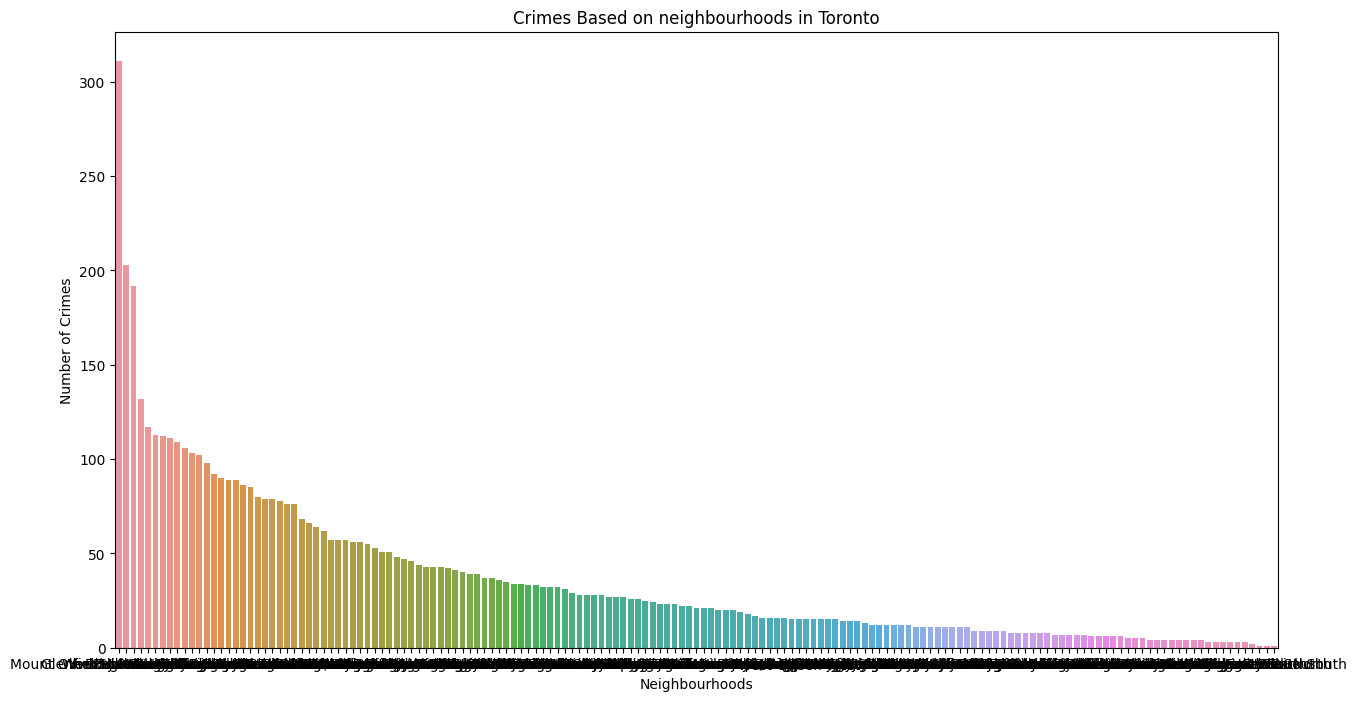

In [41]:
#Neighbourhodo barchart
plt.figure(figsize=(15, 8)) #figure size
sns.barplot(x=df_neighbourhood.Neighbourhood, y=df_neighbourhood.Crimes)
plt.xlabel('Neighbourhoods')
plt.ylabel('Number of Crimes')
plt.title('Crimes Based on neighbourhoods in Toronto')
plt.show()

It seems like it is hard to get anything from this barchart because there is so many neighbourhourhoods. So, let's just select the top 20 neighrbouhoods with the highest crimes rates.

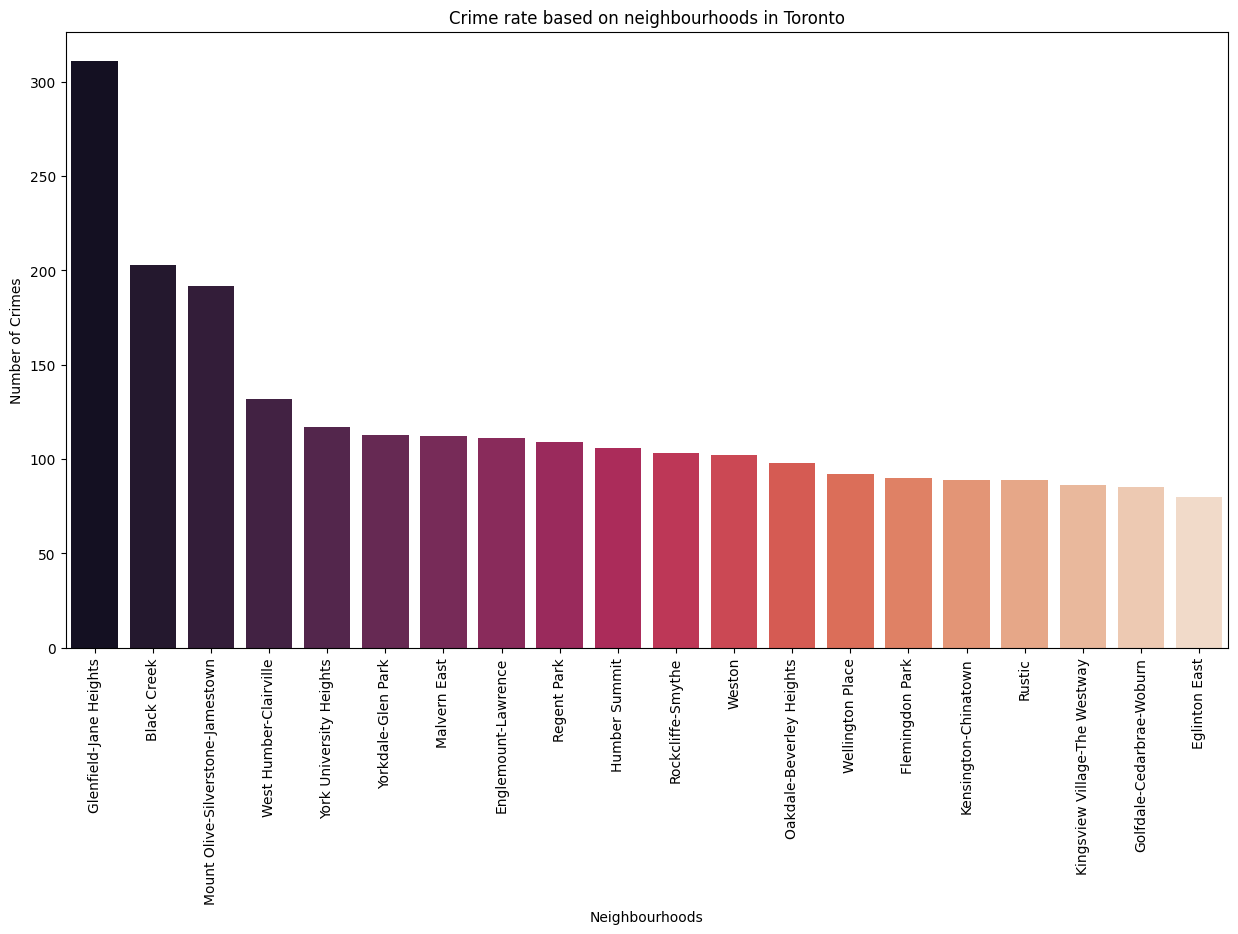

In [54]:
df_neighbourhood=df['Neighbourhood'].value_counts().head(20)
df_neighbourhood=df_neighbourhood.reset_index()
df_neighbourhood.columns=['Neighbourhood', 'Crimes']
plt.figure(figsize=(15, 8)) #figure size
sns.barplot(x=df_neighbourhood.Neighbourhood, y=df_neighbourhood.Crimes, palette='rocket')
plt.xlabel('Neighbourhoods')
plt.ylabel('Number of Crimes')
plt.title('Crime rate based on neighbourhoods in Toronto')
plt.xticks(rotation=90)
plt.show()